###  Import the Libraries and optionally ignore warnings for a cleaner notebook. 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###  Read the Mall_Customers.csv and check the head of the dataframe

In [34]:
df = pd.read_csv('Mall_Customers.csv')

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Plot the scatter of Income vs the Spend Score.  you naturally see any clusters in the data

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

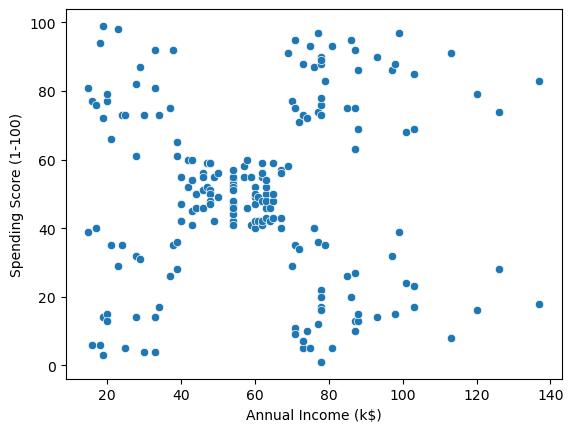

In [36]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)')

### Define X as the numerical columns of the data and perform scaling to get X_scaled

In [37]:
X = df.iloc[:, [3,4]].values

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### From sklearn.cluster import KMeans

In [16]:
from sklearn.cluster import KMeans

### Run KMeans for values of K between 1 and 10. Then do a Elbow plot to get the best K

In [40]:
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

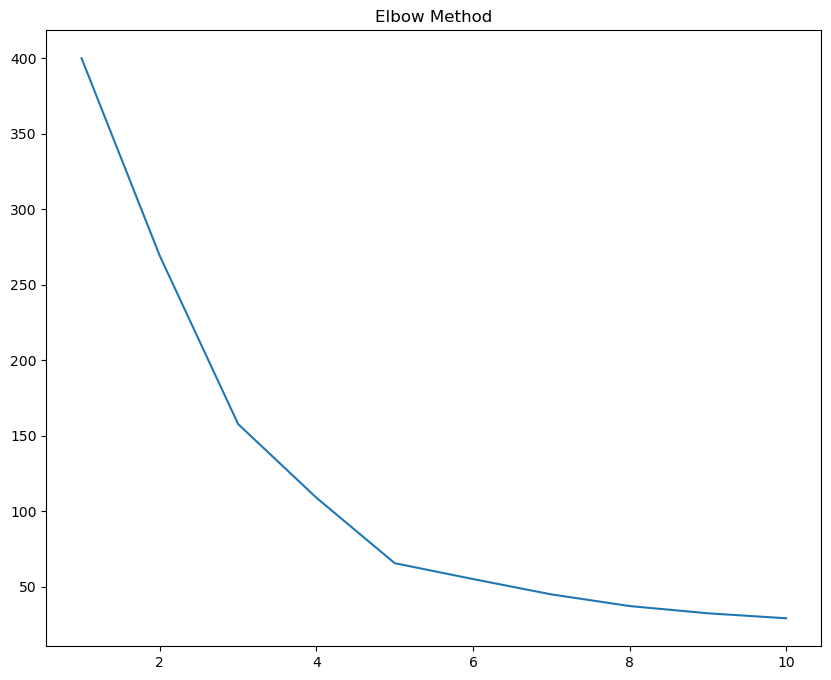

In [41]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), SSE)
plt.title('Elbow Method')

###  Now that we see the best K, use K=5 to train KMeans. Then get the clusters in the data and append in the original df

In [21]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [26]:
clusters = kmeans.fit_predict(X_scaled)

In [28]:
df['Cluster'] = clusters

In [29]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


 ### Plot the scatter again but color for the cluster

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

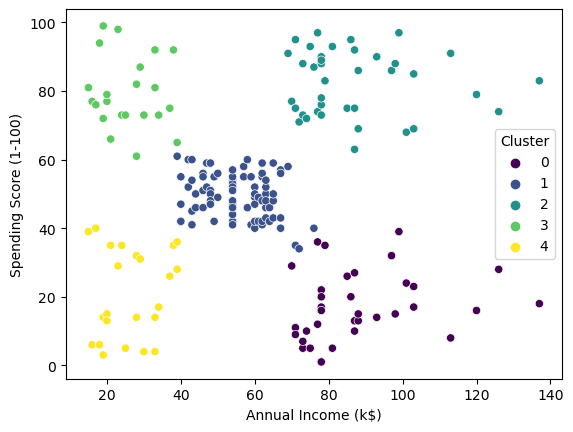

In [33]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='viridis')

## Cluster 0 : High Income, Low Spend

##### Strategy: Highlight high-value products that offer quality and durability.
##### Campaigns: Exclusive offers on durable goods, loyalty rewards for long-term customers.

## Cluster 1 : Average Income and Spend

##### Strategy: Provide balanced value-for-money offerings.
##### Campaigns: Seasonal promotions, package deals, and competitive pricing.

## Cluster 2 : High Income, High Spend

##### Strategy: Market luxury and premium products.
##### Campaigns: Exclusive events, premium memberships, and personalized services.

## Cluster 3 : Low Income, High Spend

##### Strategy: Offer attractive deals on products that are perceived as luxuries on a budget.
##### Campaigns: Flash sales, discounts, and buy-one-get-one offers.

## Cluster 4 : Low Income, Low Spend
#### Strategy: Focus on affordability and basic needs.
##### Campaigns: Everyday low prices, essential goods discounts, and bulk purchase deals.